In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [37]:
train_size = 0.7
valid_size = 0.1
test_size = 0.2
batch = 16

data = datasets.MNIST(root = "../data/MNIST", download = True, transform = transforms.ToTensor())

train, valid, test = random_split(data, [train_size, valid_size, test_size])

train_loader = DataLoader(train, batch_size = batch, shuffle = True)
valid_loader = DataLoader(valid, batch_size = batch, shuffle = False)
test_loader = DataLoader(test, batch_size = batch, shuffle = False)

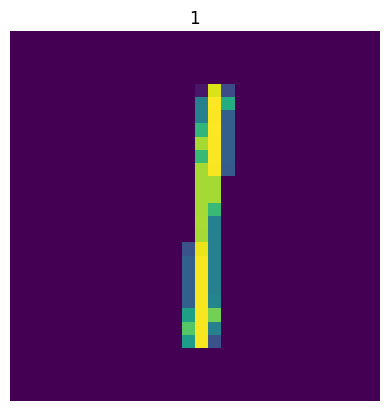

In [38]:
image, label = next(iter(train_loader))

image = torch.squeeze(image[0])

plt.imshow(image)

plt.title(label[0].item())
plt.axis('off')

plt.show()


In [39]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.flatten(x)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

In [40]:
model = NN().to(device)
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr = 1e-3, momentum = 0.5)

epochs = 10

In [41]:
def train(epochs, train_loader, valid_loader):
    train_loss = []
    valid_loss = []
    for _ in range(epochs):
        total_train_loss = 0
        total_valid_loss = 0

        model.train()
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            optim.zero_grad()
            output = model(data)
            losses = loss(output, label)
            losses.backward()
            optim.step()
            total_train_loss += losses.item()
        train_loss.append(total_train_loss/len(train_loader))
        
        model.eval()
        with torch.no_grad():
            for data, label in valid_loader:
                data = data.to(device)
                label = label.to(device)
                output = model(data)
                losses = loss(output, label)
                total_valid_loss += losses.item()
        valid_loss.append(total_valid_loss/(len(valid_loader)))
    return train_loss, valid_loss


In [42]:
def test(test_loader):
    total_test_loss = 0
    model.eval()
    with torch.no_grad():
        for data, label in test_loader:
            data = data.to(device)
            label = label.to(device)
            output = model(data)
            losses = loss(output, label)
            total_test_loss += losses.item()
    return total_test_loss/len(test_loader)

In [43]:
train_loss, valid_loss = train(epochs, train_loader, valid_loader)

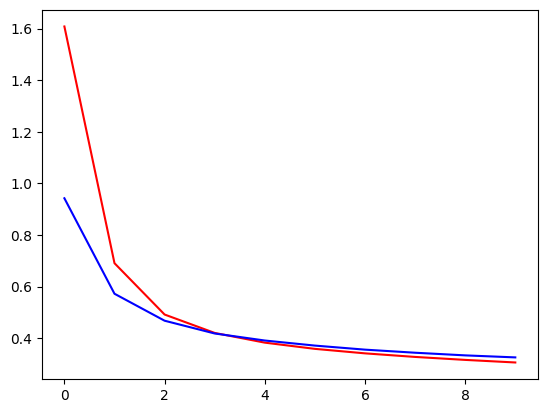

In [44]:
plt.plot(train_loss, color = 'r')
plt.plot(valid_loss, color = 'b')

plt.show()

In [45]:
loss = test(test_loader)
loss

0.3279987692981958